# Homework 4: Using pre-trained BERT vectors for text classification

In [1]:
# Import all necessary packages
import os
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Step 1: get BERT repository from github from the given link
           # https://github.com/google-research/bert
    
# Step 2: get pre trained BERT model
          # https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

# Step 3: Formatting the input files for BERT to process and produce ooutput

ORIGINAL_DATA_DIR = os.path.join("D:/Semester-1/NLP/Assignment/hw4-handout/handout/bert_input_data") #directory that contains three input csv files (copy the input files here)
BERT_FEATURE_DIR = os.path.join("D:/Semester-1/NLP/Assignment/hw4-handout/handout/bert_output_data") #directory that contains output jason files from BERT are saved
BERT_DATA_DIR = os.path.join("D:/Semester-1/NLP/Assignment/hw4-handout/handout/BERT_DATA_DIR") #directory that contains the original input csv files


In [3]:
# Step 4: Programmatically reformate the input files so that it can be processed by BERT

train = pd.read_csv(os.path.join(BERT_DATA_DIR, "lang_id_train.csv"))
train_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_train.csv"))
train_df = train_df.drop(['native_language'], axis = 1)
train_df.to_csv("D:/Semester-1/NLP/Assignment/hw4-handout/handout/bert_input_data/lang_id_train.csv",header = 0,index = "FALSE") 
# edit the path provided and add path to the lang_id_train.csv file stored in bert_input_data folder

In [4]:
train.head()

,native_language,text
0,Japanese,"who, whom, whose I have often thinking that, I..."
1,Japanese,books I love reading. It's been one of my hobb...
2,Japanese,change job I want to change job. The company t...
3,Japanese,the origin of Japanese I like to learn about a...
4,Japanese,"Marunouchi Today, I am going go to Marunouchi,..."


In [5]:
train_df.head()

,text
0,"who, whom, whose I have often thinking that, I..."
1,books I love reading. It's been one of my hobb...
2,change job I want to change job. The company t...
3,the origin of Japanese I like to learn about a...
4,"Marunouchi Today, I am going go to Marunouchi,..."


In [6]:
test = pd.read_csv(os.path.join(BERT_DATA_DIR, "lang_id_test.csv"))
test_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_test.csv"))
test_df = test_df.drop(['native_language'], axis = 1)
test_df.to_csv("D:/Semester-1/NLP/Assignment/hw4-handout/handout/bert_input_data/lang_id_test.csv",header = 0,index = "FALSE")
# edit the path provided and add path to the lang_id_test.csv file stored in bert_input_data folder

In [7]:
test.head()

,native_language,text
0,Japanese,"got an official job offer Today, I decided to ..."
1,Japanese,I am bum. I am bum.
2,Japanese,exam... I will have to take the exam tomorrow....
3,Japanese,Self-introduction and my situation I work in f...
4,Japanese,Tough Schedule Hi there. So tough schedule las...


In [8]:
test_df.head()

,text
0,"got an official job offer Today, I decided to ..."
1,I am bum. I am bum.
2,exam... I will have to take the exam tomorrow....
3,Self-introduction and my situation I work in f...
4,Tough Schedule Hi there. So tough schedule las...


In [9]:
eval = pd.read_csv(os.path.join(BERT_DATA_DIR, "lang_id_eval.csv"))
eval_df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "lang_id_eval.csv"))
eval_df = eval_df.drop(['native_language'], axis = 1)
eval_df.to_csv("D:/Semester-1/NLP/Assignment/hw4-handout/handout/bert_input_data/lang_id_eval.csv",header = 0,index = "FALSE")
#edit the path provided and add path to the lang_id_eval.csv file stored in bert_input_data folder

In [10]:
eval.head()

,native_language,text
0,Japanese,What you can do for your health and I like it ...
1,Japanese,How to use `peanut butter ' Hello ! I have a ...
2,Japanese,earthquake I went to listen to a lecture meeti...
3,Japanese,The Questions There are many abbrebiations and...
4,Japanese,"Long time no see!!! I""m very tied! Many part t..."


In [11]:
eval_df.head()

,text
0,What you can do for your health and I like it ...
1,How to use `peanut butter ' Hello ! I have a ...
2,earthquake I went to listen to a lecture meeti...
3,The Questions There are many abbrebiations and...
4,"Long time no see!!! I""m very tied! Many part t..."


In [12]:
# Step 5: Run the shell script to generate the feature vecors

# Step 6: Obtain the BERT vectors

bert_vectors = []
with open(os.path.join(BERT_FEATURE_DIR,"lang_id_train.jsonlines"), "rt") as infile:
    for line in infile:
        bert_data = json.loads(line)
        for t in bert_data["features"]:
            # Only extract the [CLS] vector used for classification
            if t["token"] == "[CLS]":
                # We only use the representation at the final layer of the network
                bert_vectors.append(t["layers"][0]["values"])
                break

In [13]:
x_train = np.array(bert_vectors)
y_train = train["native_language"].values

In [14]:
x_train

array([[-0.248193,  0.149587, -0.01292 , ..., -0.414284,  0.563247,
         0.847716],
       [ 0.25184 , -0.027603,  0.085174, ...,  0.01882 ,  0.385593,
         0.495373],
       [-0.09523 ,  0.269797,  0.45346 , ..., -0.481863,  0.442096,
         0.312301],
       ...,
       [-0.08231 ,  0.222228,  0.343266, ..., -0.504133,  0.924348,
         0.113342],
       [ 0.045683, -0.046092, -0.438891, ..., -0.26537 ,  0.54027 ,
         0.1456  ],
       [ 0.159554, -0.167764,  0.520829, ..., -0.145491,  0.358102,
         0.074443]])

In [15]:
y_train

array(['Japanese', 'Japanese', 'Japanese', ..., 'Arabic', 'Arabic',
       'Arabic'], dtype=object)

In [16]:
# Step 7: Train the model

lr_model = LogisticRegression(penalty="l2", C=1.0)
model_fit = lr_model.fit(x_train, y_train)

C:\Users\prita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
model_fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
bert_vectors = []
with open(os.path.join(BERT_FEATURE_DIR,"lang_id_test.jsonlines"), "rt") as infile:
    for line in infile:
        bert_data = json.loads(line)
        for t in bert_data["features"]:
            # Only extract the [CLS] vector used for classification
            if t["token"] == "[CLS]":
                # We only use the representation at the final layer of the network
                bert_vectors.append(t["layers"][0]["values"])
                break

In [19]:
x_test = np.array(bert_vectors)
y_test = test["native_language"].values

In [20]:
x_test

array([[ 0.238339, -0.051916, -0.105911, ..., -0.222749,  0.382177,
         0.248042],
       [-0.089541, -0.360686,  0.131793, ...,  0.016823,  0.536598,
         0.708057],
       [ 0.184121,  0.047065,  0.315405, ..., -0.125078,  0.27891 ,
         0.517292],
       ...,
       [ 0.498343,  0.423073, -0.153529, ..., -0.356517,  0.367096,
         0.367714],
       [-0.556586, -0.577899,  0.452868, ..., -0.405716,  0.357567,
         0.269214],
       [ 0.143796,  0.442142, -0.116725, ..., -0.326696,  0.258988,
         0.079421]])

In [21]:
y_test

array(['Japanese', 'Japanese', 'Japanese', ..., 'Arabic', 'Arabic',
       'Arabic'], dtype=object)

In [22]:
# Step 8: Predict the native language on testing dataset

predict_nl = lr_model.predict(x_test)

In [23]:
predict_nl

array(['Japanese', 'Korean', 'Japanese', ..., 'Mandarin', 'Mandarin',
       'Mandarin'], dtype=object)

In [24]:
accuracy = accuracy_score(y_test, predict_nl)

In [25]:
accuracy

0.3745

In [26]:
report = classification_report(y_test, predict_nl)

In [27]:
print(report)

              precision    recall  f1-score   support

      Arabic       0.31      0.12      0.17       200
   Cantonese       0.32      0.17      0.23       200
    Japanese       0.49      0.85      0.62       200
      Korean       0.29      0.41      0.34       200
    Mandarin       0.11      0.14      0.12       200
      Polish       0.54      0.32      0.40       200
     Russian       0.58      0.58      0.58       200
     Spanish       0.51      0.36      0.42       200
        Thai       0.72      0.55      0.63       200
  Vietnamese       0.14      0.23      0.18       200

    accuracy                           0.37      2000
   macro avg       0.40      0.37      0.37      2000
weighted avg       0.40      0.37      0.37      2000



C:\Users\prita\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\prita\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\prita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

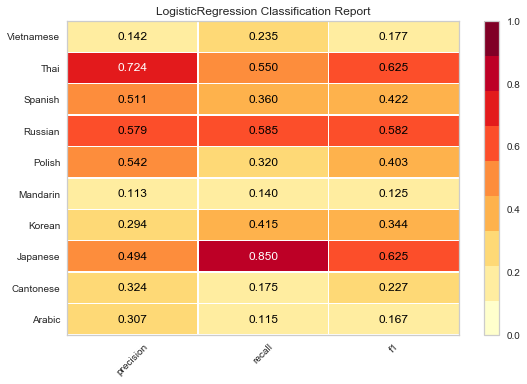

In [28]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
visualize = ClassificationReport(LogisticRegression())
visualize.fit(x_train, y_train)
y_test = test["native_language"].values
visualize.score(x_test, y_test)
visualize.show()

In [30]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, predict_nl)
print(con_matrix)

[[ 23   3   3   6 139   4   3   3   1  15]
 [  4  35   1  18  32   2   4   2  10  92]
 [  2   4 170  11   5   2   5   0   0   1]
 [  1   2  78  83   6   1  10   7   9   3]
 [ 12  38  28  48  28   7  12   6   6  15]
 [  3   0   9   5  16  64  24   9   1  69]
 [  3   3  12  32   2  14 117  15   0   2]
 [ 12   1   7  14  11   8  10  72   2  63]
 [  6   7   8  30   5   3   2   6 110  23]
 [  9  15  28  35   4  13  15  21  13  47]]


C:\Users\prita\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\prita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


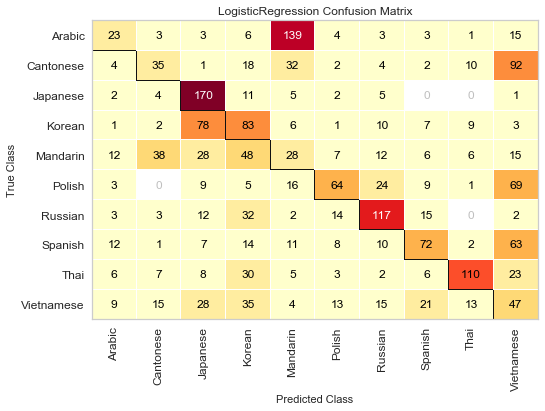

In [31]:
from yellowbrick.classifier import ConfusionMatrix
visualize = ConfusionMatrix(LogisticRegression())
visualize.fit(x_train, y_train)
visualize.score(x_test, y_test)
visualize.show()